In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import norm
import warnings

warnings.filterwarnings('ignore')
%matplotlib inline




from sklearn.impute import KNNImputer
from sklearn.preprocessing import LabelEncoder,OneHotEncoder,StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import r2_score,mean_squared_error

import random

In [2]:
# Download Data from URL https://www.kaggle.com/datasets/brijbhushannanda1979/bigmart-sales-data

df_train = pd.read_csv('train.csv')
df_train

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


In [3]:
df_train.describe(include='all')

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
count,8523,7060.000000,8523,8523.000000,8523,8523.000000,8523,8523.000000,6113,8523,8523,8523.000000
unique,1559,NaN,5,NaN,16,NaN,10,NaN,3,3,4,NaN
top,FDG33,NaN,Low Fat,NaN,Fruits and Vegetables,NaN,OUT027,NaN,Medium,Tier 3,Supermarket Type1,NaN
freq,10,NaN,5089,NaN,1232,NaN,935,NaN,2793,3350,5577,NaN
mean,NaN,12.857645,NaN,0.066132,NaN,140.992782,NaN,1997.831867,NaN,NaN,NaN,2181.288914
std,NaN,4.643456,NaN,0.051598,NaN,62.275067,NaN,8.371760,NaN,NaN,NaN,1706.499616
min,NaN,4.555000,NaN,0.000000,NaN,31.290000,NaN,1985.000000,NaN,NaN,NaN,33.290000
25%,NaN,8.773750,NaN,0.026989,NaN,93.826500,NaN,1987.000000,NaN,NaN,NaN,834.247400
50%,NaN,12.600000,NaN,0.053931,NaN,143.012800,NaN,1999.000000,NaN,NaN,NaN,1794.331000
75%,NaN,16.850000,NaN,0.094585,NaN,185.643700,NaN,2004.000000,NaN,NaN,NaN,3101.296400


# Some Observations 
1. We can make 3 categories in Item_Identifier Like FD: Food , DR:Drink , NC: Non Consumable
2. Item Weight having missing values needs imputation of same
3. Item Fat Content have 5 may be same values but captial , small letter etc need to make 2 or 2 category Also NC Item not having fat content needs to change 
4. Item Visiblity minimum value is 0 which is not possible needs to impute with other value 
5. Item Type have 16 categories, Check Item_identifier and Item Type Representing same values. 
6. Item MRP Range is different may be scaling is required 
7. Outlet Identifier 10 unique present check is it contributing or not 
8. Outlet Establishment Year can be used to impute age and then scaling can be performed 
9. Missing Values are present in outlet Size need to impute them 
10. Outlet_location _type check is it contributing or not same with outlet Type.



In [4]:
# item_identifier 
df_train['Item_Identifier'] = df_train['Item_Identifier'].apply(lambda x : x[:2])

<AxesSubplot:xlabel='Item_Identifier', ylabel='count'>

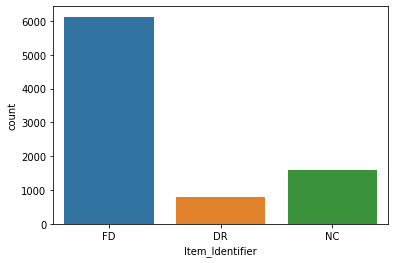

In [5]:
sns.countplot(df_train['Item_Identifier'])

<AxesSubplot:xlabel='Item_Identifier', ylabel='Item_Outlet_Sales'>

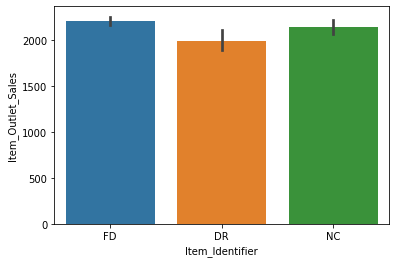

In [6]:
sns.barplot(x=df_train['Item_Identifier'],y=df_train['Item_Outlet_Sales'])

<AxesSubplot:xlabel='Item_Identifier', ylabel='Item_Outlet_Sales'>

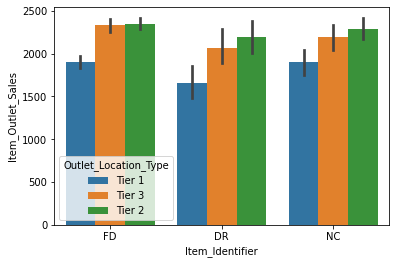

In [7]:
sns.barplot(x=df_train['Item_Identifier'],y=df_train['Item_Outlet_Sales'],hue=df_train['Outlet_Location_Type'])

In [8]:
# Item_weight 
df_train['Item_Weight'].isnull().sum() 

1463

In [9]:
data = df_train[['Item_Weight']]


imputer=KNNImputer(n_neighbors=3, weights='uniform',missing_values=np.nan)
new_array=imputer.fit_transform(data) # impute the missing values
new_data = pd.DataFrame(data=new_array,columns=data.columns)

df_train['Item_Weight'] = new_data
df_train['Item_Weight'].isnull().sum() 

0

<AxesSubplot:xlabel='Item_Weight', ylabel='Item_Outlet_Sales'>

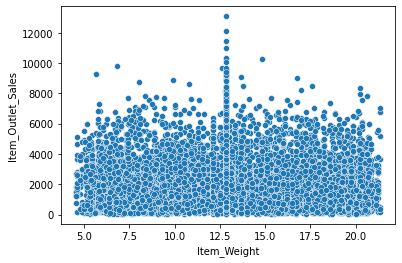

In [10]:

sns.scatterplot(x=df_train['Item_Weight'],y=df_train['Item_Outlet_Sales'])

In [11]:
# Item_fat_content
# Replacing other same categories 
df_train['Item_Fat_Content'].unique()
df_train['Item_Fat_Content'] = df_train['Item_Fat_Content'].replace(['low fat','LF','reg'],['Low Fat','Low Fat','Regular'])


In [12]:
# replacing non concumable fat content with other category 
df_train.loc[df_train['Item_Identifier']=='NC','Item_Fat_Content'] = 'Non Edible' 
df_train['Item_Fat_Content'].unique()

array(['Low Fat', 'Regular', 'Non Edible'], dtype=object)

<AxesSubplot:xlabel='Item_Fat_Content', ylabel='count'>

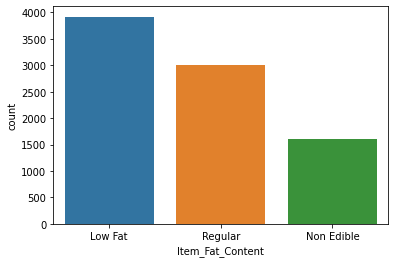

In [13]:
sns.countplot(df_train['Item_Fat_Content'])

<AxesSubplot:xlabel='Item_Fat_Content', ylabel='Item_Outlet_Sales'>

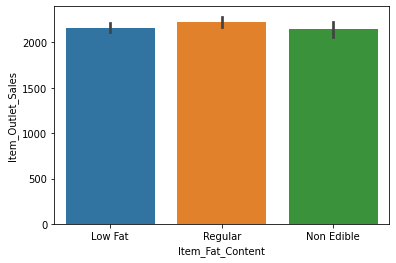

In [14]:
sns.barplot(x=df_train['Item_Fat_Content'],y=df_train['Item_Outlet_Sales'])

<AxesSubplot:xlabel='Item_Fat_Content', ylabel='Item_Outlet_Sales'>

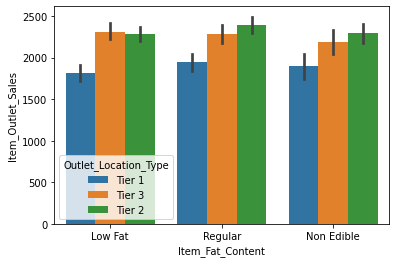

In [15]:
sns.barplot(x=df_train['Item_Fat_Content'],y=df_train['Item_Outlet_Sales'],hue=df_train['Outlet_Location_Type'])

In [16]:
# Above diagram shows item with 0 visibilty has more sales but this is not possible at all so will do changes 
df_train['Item_Visibility'] = df_train['Item_Visibility'].replace(0,df_train['Item_Visibility'].mean())

<AxesSubplot:xlabel='Item_Visibility', ylabel='Item_Outlet_Sales'>

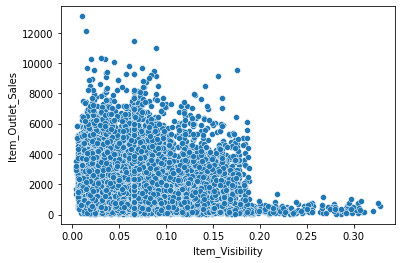

In [17]:
# Item Visibility 
sns.scatterplot(x=df_train['Item_Visibility'],y=df_train['Item_Outlet_Sales'])

In [18]:
# Item_type

df_train['Item_Type'].unique()

array(['Dairy', 'Soft Drinks', 'Meat', 'Fruits and Vegetables',
       'Household', 'Baking Goods', 'Snack Foods', 'Frozen Foods',
       'Breakfast', 'Health and Hygiene', 'Hard Drinks', 'Canned',
       'Breads', 'Starchy Foods', 'Others', 'Seafood'], dtype=object)

In [19]:
df_train['Item_Type'].value_counts()

Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64

<AxesSubplot:xlabel='Item_Type', ylabel='count'>

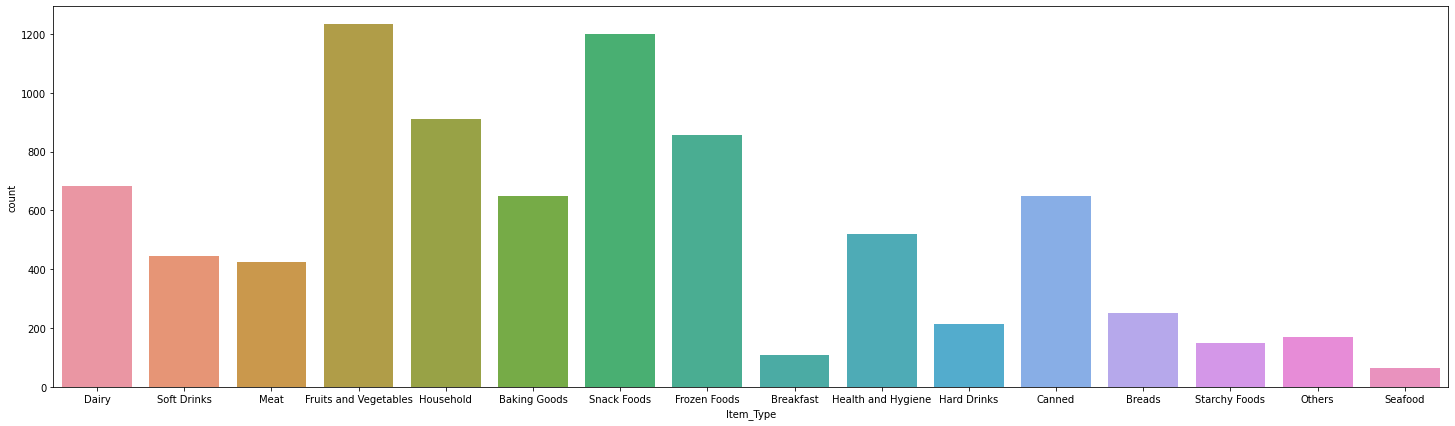

In [20]:
plt.figure(figsize=(25,7))
sns.countplot('Item_Type',data=df_train)

<AxesSubplot:xlabel='Item_Outlet_Sales', ylabel='Item_Type'>

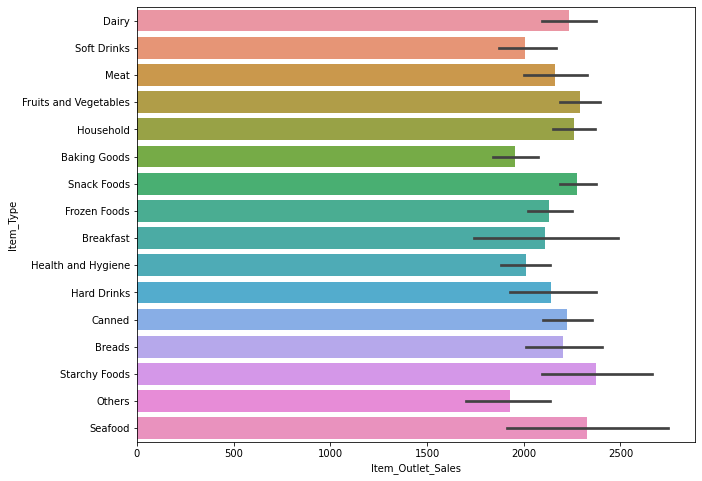

In [21]:
plt.figure(figsize=(10,8))
sns.barplot(y='Item_Type',x='Item_Outlet_Sales',data=df_train)

In [22]:
a = df_train[df_train['Item_Identifier'] == 'FD']
a['Item_Type'].unique()

array(['Dairy', 'Meat', 'Fruits and Vegetables', 'Baking Goods',
       'Snack Foods', 'Frozen Foods', 'Breakfast', 'Canned', 'Breads',
       'Starchy Foods', 'Seafood'], dtype=object)

In [23]:
a = df_train[df_train['Item_Identifier'] == 'DR']
a['Item_Type'].unique()

array(['Soft Drinks', 'Hard Drinks', 'Dairy'], dtype=object)

In [24]:
a = df_train[df_train['Item_Identifier'] == 'NC']
a['Item_Type'].unique()

array(['Household', 'Health and Hygiene', 'Others'], dtype=object)

<AxesSubplot:xlabel='Item_MRP', ylabel='Item_Outlet_Sales'>

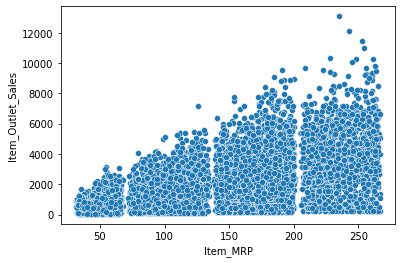

In [25]:
# Item MRP 
sns.scatterplot(x=df_train['Item_MRP'],y=df_train['Item_Outlet_Sales'])


<AxesSubplot:xlabel='Outlet_Identifier', ylabel='count'>

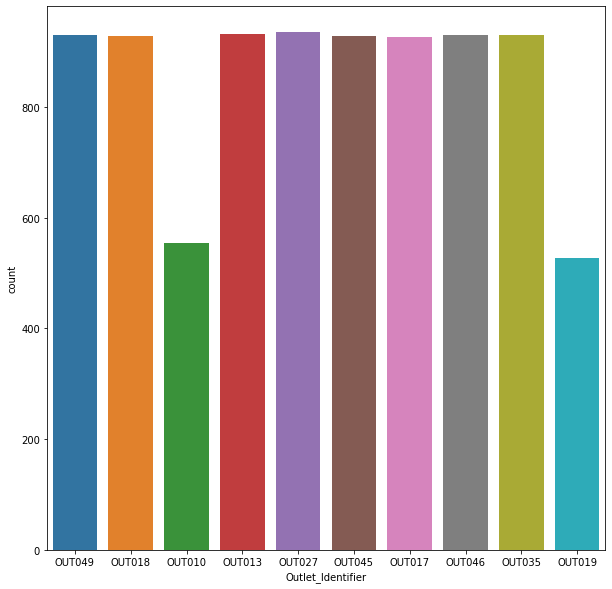

In [26]:
# Outlet Identifier 
plt.figure(figsize=(10,10))
sns.countplot(df_train['Outlet_Identifier'])


<AxesSubplot:xlabel='Outlet_Identifier', ylabel='Item_Outlet_Sales'>

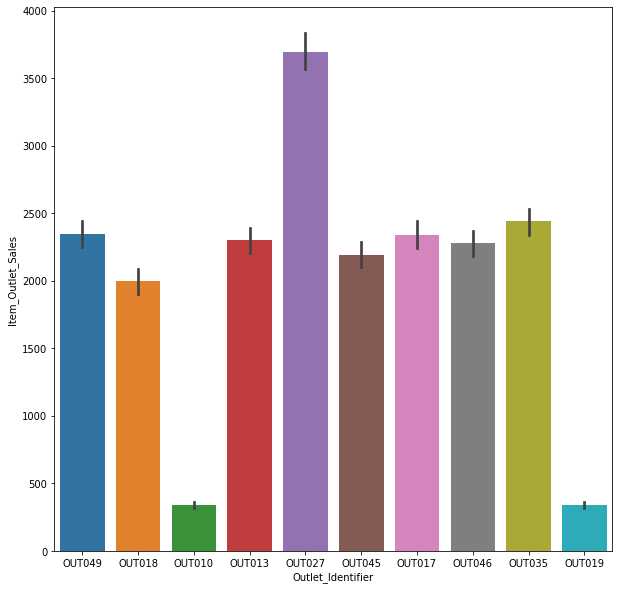

In [27]:
plt.figure(figsize=(10,10))
sns.barplot(x=df_train['Outlet_Identifier'],y=df_train['Item_Outlet_Sales'])

In [28]:
#df_train.drop(columns=['Outlet_Identifier'],inplace=True)

In [29]:
# Outlet Estabolisthment year 
df_train['Outlet_Age']= df_train['Outlet_Establishment_Year'].apply(lambda x : 2013 - x)
df_train.drop(columns=['Outlet_Establishment_Year'],inplace=True)

<AxesSubplot:xlabel='Outlet_Age', ylabel='count'>

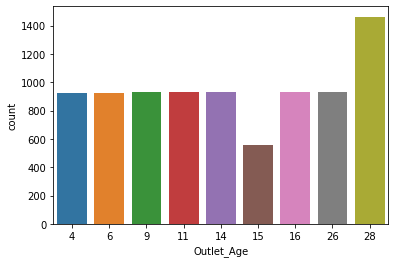

In [30]:
sns.countplot(df_train['Outlet_Age'])

<AxesSubplot:xlabel='Outlet_Age', ylabel='Item_Outlet_Sales'>

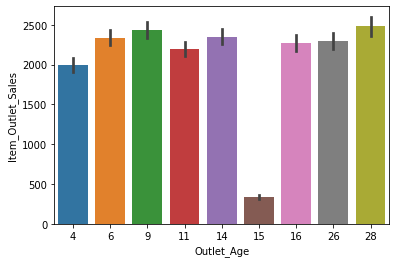

In [31]:
sns.barplot(x=df_train['Outlet_Age'],y=df_train['Item_Outlet_Sales'])

In [32]:
# Outlet _Size 
df_train['Outlet_Size'].isnull().sum()

2410

<AxesSubplot:xlabel='Outlet_Size', ylabel='count'>

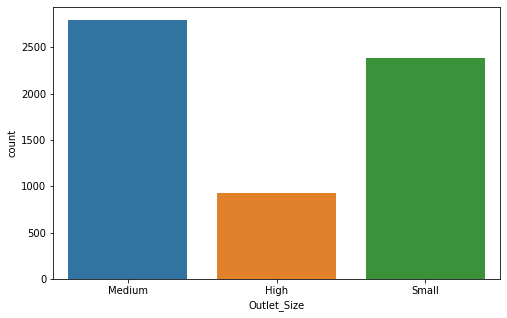

In [33]:
plt.figure(figsize=(8,5))
sns.countplot('Outlet_Size',data=df_train)

In [34]:
# We can impute this values with knn imputer but we have to encode it first 
le =LabelEncoder()

df_train['Outlet_Size'] = le.fit_transform(df_train['Outlet_Size'])

In [37]:
#Replace 3 with np.nan
df_train['Outlet_Size'].replace(3,np.nan,inplace=True)

In [38]:
# Imputing Missing Values
data = df_train[['Outlet_Size']]


imputer=KNNImputer(n_neighbors=3, weights='uniform',missing_values=np.nan)
new_array=imputer.fit_transform(data) # impute the missing values
new_data = pd.DataFrame(data=new_array,columns=data.columns)

df_train['Outlet_Size'] = new_data
df_train['Outlet_Size'].isnull().sum()



0

<AxesSubplot:xlabel='Outlet_Location_Type', ylabel='count'>

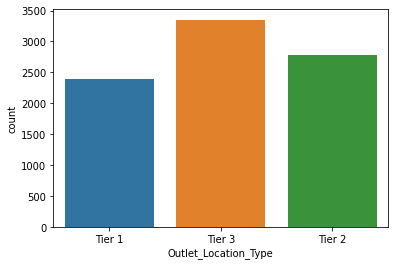

In [39]:
# Outlet_location_type
sns.countplot('Outlet_Location_Type',data=df_train)

<AxesSubplot:xlabel='Outlet_Type', ylabel='count'>

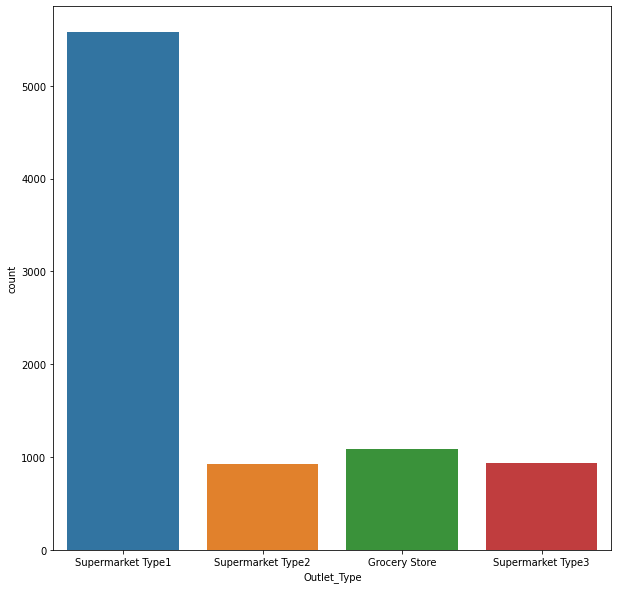

In [40]:
# Outlet Type 
plt.figure(figsize=(10,10))
sns.countplot('Outlet_Type',data=df_train)

In [41]:
df_train.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Item_Identifier       8523 non-null   object 
 1   Item_Weight           8523 non-null   float64
 2   Item_Fat_Content      8523 non-null   object 
 3   Item_Visibility       8523 non-null   float64
 4   Item_Type             8523 non-null   object 
 5   Item_MRP              8523 non-null   float64
 6   Outlet_Identifier     8523 non-null   object 
 7   Outlet_Size           8523 non-null   float64
 8   Outlet_Location_Type  8523 non-null   object 
 9   Outlet_Type           8523 non-null   object 
 10  Item_Outlet_Sales     8523 non-null   float64
 11  Outlet_Age            8523 non-null   int64  
dtypes: float64(5), int64(1), object(6)
memory usage: 799.2+ KB


# Outlier Checking 

<AxesSubplot:>

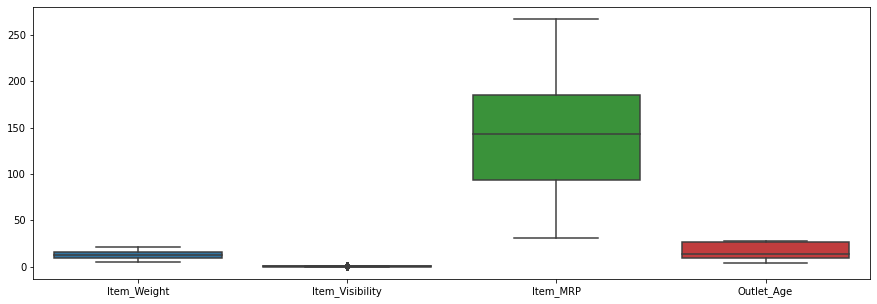

In [42]:
num_cols=['Item_Weight', 'Item_Visibility', 'Item_MRP', 'Outlet_Age']
plt.figure(figsize=(15,5))
sns.boxplot(data=df_train[num_cols])

# Correlations 

<AxesSubplot:>

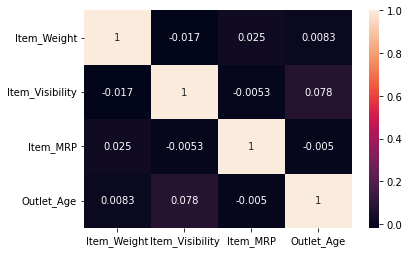

In [43]:
sns.heatmap(df_train[num_cols].corr(), annot=True)


# Feature Selection

In [44]:
# Checking Fearture importance with RF 
X = df_train.drop(columns=['Item_Outlet_Sales'])
y = df_train['Item_Outlet_Sales']

In [45]:
X

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,Outlet_Age
0,FD,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1.000000,Tier 1,Supermarket Type1,14
1,DR,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,1.000000,Tier 3,Supermarket Type2,4
2,FD,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1.000000,Tier 1,Supermarket Type1,14
3,FD,19.200,Regular,0.066132,Fruits and Vegetables,182.0950,OUT010,1.238181,Tier 3,Grocery Store,15
4,NC,8.930,Non Edible,0.066132,Household,53.8614,OUT013,0.000000,Tier 3,Supermarket Type1,26
...,...,...,...,...,...,...,...,...,...,...,...
8518,FD,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,0.000000,Tier 3,Supermarket Type1,26
8519,FD,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,1.238181,Tier 2,Supermarket Type1,11
8520,NC,10.600,Non Edible,0.035186,Health and Hygiene,85.1224,OUT035,2.000000,Tier 2,Supermarket Type1,9
8521,FD,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,1.000000,Tier 3,Supermarket Type2,4


In [46]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Item_Identifier       8523 non-null   object 
 1   Item_Weight           8523 non-null   float64
 2   Item_Fat_Content      8523 non-null   object 
 3   Item_Visibility       8523 non-null   float64
 4   Item_Type             8523 non-null   object 
 5   Item_MRP              8523 non-null   float64
 6   Outlet_Identifier     8523 non-null   object 
 7   Outlet_Size           8523 non-null   float64
 8   Outlet_Location_Type  8523 non-null   object 
 9   Outlet_Type           8523 non-null   object 
 10  Outlet_Age            8523 non-null   int64  
dtypes: float64(4), int64(1), object(6)
memory usage: 732.6+ KB


In [47]:
encode_features = ['Item_Identifier','Item_Fat_Content','Outlet_Location_Type','Outlet_Type','Item_Type','Outlet_Identifier']

for i in encode_features:
    X[i] = le.fit_transform(X[i])

In [48]:
X

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,Outlet_Age
0,1,9.300,0,0.016047,4,249.8092,9,1.000000,0,1,14
1,0,5.920,2,0.019278,14,48.2692,3,1.000000,2,2,4
2,1,17.500,0,0.016760,10,141.6180,9,1.000000,0,1,14
3,1,19.200,2,0.066132,6,182.0950,0,1.238181,2,0,15
4,2,8.930,1,0.066132,9,53.8614,1,0.000000,2,1,26
...,...,...,...,...,...,...,...,...,...,...,...
8518,1,6.865,0,0.056783,13,214.5218,1,0.000000,2,1,26
8519,1,8.380,2,0.046982,0,108.1570,7,1.238181,1,1,11
8520,2,10.600,1,0.035186,8,85.1224,6,2.000000,1,1,9
8521,1,7.210,2,0.145221,13,103.1332,3,1.000000,2,2,4


In [49]:
scaling_features = ['Item_Weight','Item_Visibility','Item_MRP','Outlet_Age','Item_Type']
SL = StandardScaler()
a = X[scaling_features]


SL.fit(a)
c = SL.transform(a)
b = pd.DataFrame(c,columns=a.columns)


encode_features = ['Item_Identifier','Item_Fat_Content','Outlet_Location_Type','Outlet_Type','Outlet_Identifier']
d = X[encode_features]
X = pd.concat([b,d],axis=1)
X

X['Outlet_Size'] = df_train['Outlet_Size']
X

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Age,Item_Type,Item_Identifier,Item_Fat_Content,Outlet_Location_Type,Outlet_Type,Outlet_Identifier,Outlet_Size
0,-0.841872,-1.111358,1.747454,-0.139541,-0.766479,1,0,0,1,9,1.000000
1,-1.641706,-1.045067,-1.489023,-1.334103,1.608963,0,2,2,2,3,1.000000
2,1.098554,-1.096733,0.010040,-0.139541,0.658786,1,0,0,1,9,1.000000
3,1.500838,-0.083740,0.660050,-0.020085,-0.291391,1,2,2,0,0,1.238181
4,-0.929428,-0.083740,-1.399220,1.293934,0.421242,2,1,2,1,1,0.000000
...,...,...,...,...,...,...,...,...,...,...,...
8518,-1.418084,-0.275551,1.180783,1.293934,1.371418,1,0,2,1,1,0.000000
8519,-1.059578,-0.476643,-0.527301,-0.497909,-1.716656,1,2,1,1,7,1.238181
8520,-0.534243,-0.718672,-0.897208,-0.736822,0.183698,2,1,1,1,6,2.000000
8521,-1.336444,1.538968,-0.607977,-1.334103,1.371418,1,2,2,2,3,1.000000


In [50]:
# Train Test Split 
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=22)


In [51]:
# Checking for Random Forest
RF= RandomForestRegressor()
RF.fit(X_train,y_train)
y_pred = RF.predict(X_test)

R2 = r2_score(y_test,y_pred)
print(f'accuracy {R2}')

accuracy 0.5282806364114006


In [52]:
feature_scores = pd.Series(RF.feature_importances_, index=X_train.columns).sort_values(ascending=False)

feature_scores

Item_MRP                0.444443
Outlet_Type             0.244372
Item_Visibility         0.104451
Item_Weight             0.055493
Outlet_Age              0.054111
Item_Type               0.042009
Outlet_Identifier       0.015763
Item_Fat_Content        0.013115
Outlet_Size             0.010879
Item_Identifier         0.009942
Outlet_Location_Type    0.005422
dtype: float64

In [53]:

x = X.drop(columns=['Item_Identifier','Outlet_Location_Type'])
y = df_train['Item_Outlet_Sales']

# Train Test Split 
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=22)
# Checking for Random Forest
RF= RandomForestRegressor()
RF.fit(X_train,y_train)
y_pred = RF.predict(X_test)

R2 = r2_score(y_test,y_pred)
print(f'accuracy {np.round(R2,3)}')

accuracy 0.529


# Observations from Univarient Analysis 
1. Items with low fat are bought more
2. Fruits and vegetables largely sold and also snacks also have good sales
3. Medium size stores/malls have more sales.
4. more number of stores/malls located in tier 3 cities
5. Sell from OUT027 are more than others
6. stores/malls are more of Supermarket type 1

# Observations From Bivarient Analysis 

1. sales are high for both low and regular fat items
2. Item Visibility cannot be zero.(This is error because product may rarly purchased)
3. The sales of seafood and starchy food higher and sales can be improved with having stock of this type of products
4. Item with MRP 200 -250 dollers having more sale.
5. stores/malls established 28 years before having good sales margin

# Outliers 
1. Outliers are checked by Box Plot Method. No outliers are present

# Correlation 
1. Correlation is checked by the use of Pearson Correlation Method. 
2. Multicolinarity not found 

# Conclusions 

1. Outliers and Multicolinarity not found in numerical Columns 
2. Item_Type and Item_Identifiers showing similar info we can drop one of it.
3. Item_MRP clearly maximises the Outlet sales.
4. Outlet Type being SuperMarket or Grocery Store also depicts the Outlet Sales.
5. Years Established will also tend to have loyal customers and that's how the sales margin can be acheived.
6. From Feature Selection we can drop Item_identifier, 'Outlet Location 

# Model Building 

In [54]:
X = X.drop(columns=['Item_Identifier','Outlet_Location_Type'])
y = df_train['Item_Outlet_Sales']

In [55]:
X

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Age,Item_Type,Item_Fat_Content,Outlet_Type,Outlet_Identifier,Outlet_Size
0,-0.841872,-1.111358,1.747454,-0.139541,-0.766479,0,1,9,1.000000
1,-1.641706,-1.045067,-1.489023,-1.334103,1.608963,2,2,3,1.000000
2,1.098554,-1.096733,0.010040,-0.139541,0.658786,0,1,9,1.000000
3,1.500838,-0.083740,0.660050,-0.020085,-0.291391,2,0,0,1.238181
4,-0.929428,-0.083740,-1.399220,1.293934,0.421242,1,1,1,0.000000
...,...,...,...,...,...,...,...,...,...
8518,-1.418084,-0.275551,1.180783,1.293934,1.371418,0,1,1,0.000000
8519,-1.059578,-0.476643,-0.527301,-0.497909,-1.716656,2,1,7,1.238181
8520,-0.534243,-0.718672,-0.897208,-0.736822,0.183698,1,1,6,2.000000
8521,-1.336444,1.538968,-0.607977,-1.334103,1.371418,2,2,3,1.000000


In [56]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Item_Weight        8523 non-null   float64
 1   Item_Visibility    8523 non-null   float64
 2   Item_MRP           8523 non-null   float64
 3   Outlet_Age         8523 non-null   float64
 4   Item_Type          8523 non-null   float64
 5   Item_Fat_Content   8523 non-null   int32  
 6   Outlet_Type        8523 non-null   int32  
 7   Outlet_Identifier  8523 non-null   int32  
 8   Outlet_Size        8523 non-null   float64
dtypes: float64(6), int32(3)
memory usage: 499.5 KB


In [57]:
# Train Test Split 
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=22)


In [58]:
print(f'Shape of data:{X.shape}')
print(f'Shape of X_train:{X_train.shape}')
print(f'Shape of y_train:{y_train.shape}')
print(f'Shape of X_test:{X_test.shape}')
print(f'Shape of y_test:{y_test.shape}')

Shape of data:(8523, 9)
Shape of X_train:(6818, 9)
Shape of y_train:(6818,)
Shape of X_test:(1705, 9)
Shape of y_test:(1705,)


In [62]:
# Check with Linear Regression 
LR = LinearRegression()
LR.fit(X_train,y_train)
y_pred = LR.predict(X_test)

R2 = r2_score(y_test,y_pred)
print(f'accuracy {np.round(R2,2)}')
rmse = np.sqrt(mean_squared_error(y_test,y_pred))
print(f'RMSE {np.round(rmse,2)}')

accuracy 0.5
RMSE 1247.73


In [66]:
# Checking for Random Forest
RF= RandomForestRegressor()
RF.fit(X_train,y_train)
y_pred = RF.predict(X_test)

R2 = r2_score(y_test,y_pred)
print(f'accuracy {np.round(R2,2)}')
rmse = np.sqrt(mean_squared_error(y_test,y_pred))
print(f'RMSE {np.round(rmse,2)}')

accuracy 0.53
RMSE 1200.8


In [67]:
# checking for XGBoost 
XB = XGBRegressor()
XB.fit(X_train,y_train)
y_pred = XB.predict(X_test)

R2 = r2_score(y_test,y_pred)
print(f'accuracy {np.round(R2,2)}')
rmse = np.sqrt(mean_squared_error(y_test,y_pred))
print(f'RMSE {np.round(rmse,2)}')

accuracy 0.51
RMSE 1226.63


# Comparison
| Model | R2_Score | RMSE |
| :- | -: | :-: | 
| Random_forest | 0.53 | 1200.80 | 
| XG_boost | 0.51 | 1226.63 | 
| Linear_regression | 0.50 | 1247.73 | 

# HyperParameter Tunning with RandomForest

In [ ]:
from sklearn.model_selection import GridSearchCV
param = {'n_estimators':list(range(5,50,5)),'max_depth':list(range(5,50)),
        'max_samples':list(range(5,50))}
reg = GridSearchCV(RF,param)
reg.fit(X_train,y_train)

In [ ]:
reg.best_estimator_

In [ ]:
rf = RandomForestRegressor(max_depth=7, max_samples=9, n_estimators=30)
rf.fit(X_train,y_train)
y_pred = rf.predict(X_test)

R2 = r2_score(y_test,y_pred)
print(f'accuracy {R2}')